# Handwriting Recognition

## Author: Syed (Sadat) Nazrul

This tutorial does Handwriting Recognition using a Random Forest Classifier. Here is the accompanying video for this tutorial: [youtube video](https://www.youtube.com/watch?v=PO4hePKWIGQ).  If you want the same thing using logistic regression, see this [notebook](https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/Logistic_Regression/LogisticRegression_toy_digits.ipynb) and [youtube video](https://www.youtube.com/watch?v=71iXeuKFcQM&t=1s)

#### Import libraries and dataset from Scikit-Learn

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits

digits = load_digits()

#### Analyze a sample image

<Figure size 432x288 with 0 Axes>

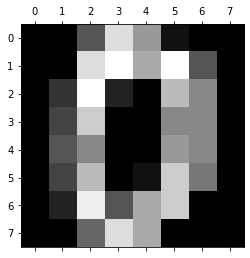

In [23]:
import pylab as pl 
pl.gray() 
pl.matshow(digits.images[0]) 
pl.show() 

#### Analyze image pixels

Each element represents the pixel of our greyscale image. The value ranges from 0 to 255 for an 8 bit pixel.

In [24]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

#### Visualize first 15 images

(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]), 0)


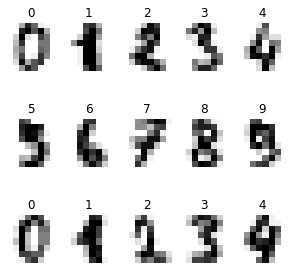

In [25]:
images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize=(5,5))
print(images_and_labels[0])
for index, (image, label) in enumerate(images_and_labels[:15]):
    plt.subplot(3, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

In [17]:
import random
from sklearn import ensemble

#Define variables
n_samples = len(digits.images)
print(digits.images[1])
x = digits.images.reshape((n_samples, -1))
print('\n',x[1])
y = digits.target

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]

 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]


In [30]:
random.sample(range(len(x)),int(len(x)/5))

[838,
 1628,
 1436,
 1598,
 5,
 470,
 588,
 1543,
 459,
 1275,
 1366,
 21,
 914,
 1090,
 1020,
 1327,
 548,
 1743,
 72,
 1369,
 71,
 1081,
 677,
 873,
 40,
 1572,
 1536,
 883,
 706,
 590,
 1688,
 1421,
 913,
 1714,
 1764,
 198,
 497,
 175,
 525,
 185,
 135,
 942,
 1032,
 1707,
 554,
 1038,
 1245,
 1749,
 802,
 446,
 178,
 1295,
 1220,
 330,
 1290,
 727,
 1027,
 709,
 720,
 594,
 1752,
 632,
 1004,
 1492,
 1738,
 1727,
 630,
 1113,
 221,
 101,
 1496,
 403,
 1488,
 1277,
 197,
 629,
 169,
 1794,
 647,
 410,
 650,
 1100,
 126,
 125,
 793,
 792,
 1080,
 1643,
 782,
 1064,
 133,
 276,
 1308,
 513,
 1000,
 581,
 259,
 607,
 1652,
 1206,
 1088,
 874,
 770,
 964,
 1530,
 875,
 954,
 1599,
 1557,
 1789,
 716,
 301,
 606,
 450,
 567,
 476,
 305,
 378,
 1760,
 1422,
 707,
 710,
 1533,
 545,
 216,
 108,
 70,
 1783,
 1541,
 1060,
 1784,
 761,
 1631,
 42,
 141,
 1294,
 1255,
 524,
 274,
 97,
 1660,
 1618,
 1287,
 1529,
 508,
 1222,
 909,
 1659,
 1341,
 300,
 528,
 972,
 76,
 613,
 1580,
 579,
 105,


In [32]:
#Create random indices 
sample_index=random.sample(range(len(x)),int(len(x)/5)) #20-80
valid_index=[i for i in range(len(x)) if i not in sample_index]

#Sample and validation images
sample_images=[x[i] for i in sample_index]
valid_images=[x[i] for i in valid_index]

#Sample and validation targets
sample_target=[y[i] for i in sample_index]
valid_target=[y[i] for i in valid_index]

#Using the Random Forest Classifier
classifier = ensemble.RandomForestClassifier()

#Fit model with sample data
classifier.fit(sample_images, sample_target)

#Attempt to predict validation data
score=classifier.score(valid_images, valid_target)
print('Random Tree Classifier:\n')
print ('Score\t'+str(score))

/home/leticia/miniconda3/envs/ambi/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Tree Classifier:

Score	0.8866481223922114


64


<Figure size 432x288 with 0 Axes>

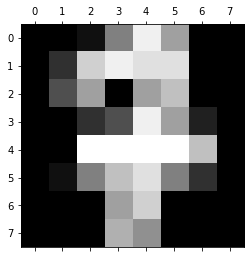

64


ValueError: Expected 2D array, got 1D array instead:
array=[ 0.  0.  1.  8. 15. 10.  0.  0.  0.  3. 13. 15. 14. 14.  0.  0.  0.  5.
 10.  0. 10. 12.  0.  0.  0.  0.  3.  5. 15. 10.  2.  0.  0.  0. 16. 16.
 16. 16. 12.  0.  0.  1.  8. 12. 14.  8.  3.  0.  0.  0.  0. 10. 13.  0.
  0.  0.  0.  0.  0. 11.  9.  0.  0.  0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [49]:
i=17
print(len(x[i]))
pl.gray() 
pl.matshow(digits.images[i]) 
pl.show() 

print(len(x[i]))
classifier.predict(x[i])